In [11]:
import dotenv
import os
from sqlalchemy import create_engine
import pandas as pd

username = os.getenv("username")
password = os.getenv("password")
host = os.getenv("host")
dbname = os.getenv("dbname")

dotenv.load_dotenv(override=True)
conn_string = "mysql+pymysql://" + username + ":" + password + "@" + host + "/" + dbname
db_engine = create_engine(conn_string)

In [13]:
import pandas as pd
path_or_buf = "C:/Users/HP/Downloads/Mappa-dei-pub-circoli-locali-in-Italia.json"

In [8]:
pub_map = pd.read_json(path_or_buf, encoding="latin1")

In [10]:
pub_map

,ccomune,cprovincia,cregione,cnome,canno_inserimento,cdata_e_ora_inserimento,cidentificatore_in_openstreetmap,clongitudine,clatitudine
0,ALTRO,ALTRO,ALTRO,,2011,2011-06-25T23:17:43Z,1339088150,13.733257,45.575830
1,ALTRO,ALTRO,ALTRO,Lenny's Pub,2011,2011-07-29T17:22:56Z,1375887295,12.418681,46.747584
2,ALTRO,ALTRO,ALTRO,Murrayfield Pub,2015,2015-10-24T09:28:06Z,3323888102,9.029585,45.831340
3,ALTRO,ALTRO,ALTRO,Snop?e,2010,2010-09-22T08:32:52Z,921157802,13.640939,45.954607
4,Ala di Stura,TORINO,Piemonte,,2012,2012-05-21T14:28:45Z,1760949034,7.307306,45.313150
...,...,...,...,...,...,...,...,...,...
2492,Barletta (BT),BARLETTA ANDRIA TRANI,Puglia,Santa Croce,2010,2010-01-17T16:15:08Z,615632993,16.285782,41.320671
2493,Bisceglie (BT),BARLETTA ANDRIA TRANI,Puglia,Auld Dublin,2014,2014-03-03T20:56:16Z,2613737619,16.497204,41.241814
2494,Bisceglie (BT),BARLETTA ANDRIA TRANI,Puglia,Ferus,2014,2014-01-07T19:22:18Z,2613737620,16.506175,41.240957
2495,Trani (BT),BARLETTA ANDRIA TRANI,Puglia,Re Artù,2009,2009-09-04T07:57:05Z,482836935,16.418124,41.281518


In [12]:
print("Nella tabella ci sono",len(pub_map.columns)*len(pub_map.index),"dati.")

Nella tabella ci sono 22473 dati.


In [14]:
print("I metadati sono la seguente lista:",pub_map.columns,".")

I metadati sono la seguente lista: Index(['ccomune', 'cprovincia', 'cregione', 'cnome', 'canno_inserimento',
       'cdata_e_ora_inserimento', 'cidentificatore_in_openstreetmap',
       'clongitudine', 'clatitudine'],
      dtype='object') .


In [16]:
pub_map.head(1)

,ccomune,cprovincia,cregione,cnome,canno_inserimento,cdata_e_ora_inserimento,cidentificatore_in_openstreetmap,clongitudine,clatitudine
0,ALTRO,ALTRO,ALTRO,,2011,2011-06-25T23:17:43Z,1339088150,13.733257,45.57583


In [18]:
pub_map.tail(1)

,ccomune,cprovincia,cregione,cnome,canno_inserimento,cdata_e_ora_inserimento,cidentificatore_in_openstreetmap,clongitudine,clatitudine
2496,Trani (BT),BARLETTA ANDRIA TRANI,Puglia,Well's Fargo,2009,2009-08-10T12:44:03Z,387223648,16.436765,41.267264


In [20]:
pub_map.sample()

,ccomune,cprovincia,cregione,cnome,canno_inserimento,cdata_e_ora_inserimento,cidentificatore_in_openstreetmap,clongitudine,clatitudine
849,Cembra,TRENTO,Trentino-Alto Adige,,2011,2011-08-21T22:03:38Z,440503598,11.203302,46.197711


In [22]:
pub_map.groupby("canno_inserimento").size()

canno_inserimento
2007      1
2008     48
2009    109
2010    186
2011    244
2012    447
2013    405
2014    464
2015    527
2016     66
dtype: int64

In [24]:
pub_year = pub_map["canno_inserimento"].unique() #Mi stampa un array di anni
pub_year.sort() #Ordinamento di array, non di valori
pub_year #Il risultato ordinato lo si vede stampato sulla variabile

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [26]:
longitudine = (pub_map["clongitudine"] >= 9) & (pub_map["clongitudine"] <= 10)
latitudine = (pub_map["clatitudine"] >= 45) & (pub_map["clatitudine"] <= 46)
filtro_lat_lon = longitudine & latitudine
var = pub_map.loc[filtro_lat_lon]
var.shape[0]

303

In [28]:
vicenza = pub_map["cprovincia"] == "VICENZA"
pub_vicenza = pub_map.loc[vicenza]
pub_vicenza.shape[0] #0 tra parentesi quadre prende il numero di indice,
                    #se fosse scritto 1 prenderebbe il numero di colonne

73

In [32]:
#Metodo 1
lazio = pub_map.loc[pub_map["cregione"] == "Lazio"]
abruzzo = pub_map.loc[pub_map["cregione"] == "Abruzzo"]
laz_abr = lazio+abruzzo
num_laz_abr = laz_abr.shape[0]
num_laz_abr

237

In [34]:
#Metodo 2
num_lazio = lazio.shape[0]
num_abruzzo = abruzzo.shape[0]
num_laz_abr2 = num_lazio + num_abruzzo
num_laz_abr2

237

In [36]:
file_path = "C:/Users/HP/Downloads/archive/beginner_datasets/iris.csv"
iris = pd.read_csv(file_path)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [38]:
len_iris = iris["petal_length"].mean()
len_iris

3.758666666666666

In [40]:
len_iris_species = iris.groupby("species")["petal_length"].mean()
len_iris_species

species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal_length, dtype: float64

In [42]:
iris_species_agg = iris.groupby("species")["petal_length"].agg("mean","min","max")
iris_species_agg

species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal_length, dtype: float64

In [44]:
employees_df = pd.DataFrame({ 'employee_id': [101, 102, 103, 104, 105],
                             'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],
                             'department_id': [1, 2, 1, 2, 3] })

In [46]:
departments_df = pd.DataFrame({ 'department_id': [1, 2, 3],
                               'department_name': ['HR', 'IT', 'Finance'],
                               'location': ['New York', 'San Francisco', 'Chicago'] })

In [48]:
employees_df.merge(departments_df, how = "inner", on = "department_id")

,employee_id,name,department_id,department_name,location
0,101,Alice,1,HR,New York
1,103,Charlie,1,HR,New York
2,102,Bob,2,IT,San Francisco
3,104,David,2,IT,San Francisco
4,105,Emma,3,Finance,Chicago


In [50]:
employees_df = employees_df.set_index("department_id")
departments_df = departments_df.set_index("department_id")
employees_df.join(departments_df)

,employee_id,name,department_name,location
department_id,,,,
1,101,Alice,HR,New York
1,103,Charlie,HR,New York
2,102,Bob,IT,San Francisco
2,104,David,IT,San Francisco
3,105,Emma,Finance,Chicago


Nel merge si aggiungono le colonne in base alla chiave primaria di una tabella e la chiave esterna dell'altra.  
Nel join si forma una tabella dove il secondo dataframe diventa un metadato che si relaziona agli attributi
della prima tabella.

In [53]:
file_path_2 = "C:/Users/HP/Downloads/archive/beginner_datasets/wine.csv"
wine = pd.read_csv(file_path_2)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [61]:
print(wine.groupby("quality")["alcohol"].mean())
print("La media totale di concentrazione di alcool è:", wine["alcohol"].mean(), ".")

quality
3    10.215000
4    10.180093
5     9.837783
6    10.587553
7    11.386006
8    11.678756
9    12.180000
Name: alcohol, dtype: float64
La media totale di concentrazione di alcool è: 10.491800831149453 .


In [65]:
wine.type.unique()

array(['red', 'white'], dtype=object)

In [67]:
print(wine.groupby("type")["alcohol"].mean())

type
red      10.422983
white    10.514267
Name: alcohol, dtype: float64


In [69]:
print(wine.groupby("quality")["pH"].mean())
print("La media totale di pH rilevato nei vini è:", wine["pH"].mean(), ".")
print(wine.groupby("type")["pH"].mean())

quality
3    3.257667
4    3.231620
5    3.212189
6    3.217726
7    3.228072
8    3.223212
9    3.308000
Name: pH, dtype: float64
La media totale di pH rilevato nei vini è: 3.2185008465445586 .
type
red      3.311113
white    3.188267
Name: pH, dtype: float64


In [71]:
print(wine.groupby("quality")["sulphates"].mean())
print("La media totale di solfati rilevato nei vini è:", wine["sulphates"].mean(), ".")
print(wine.groupby("type")["sulphates"].mean())

quality
3    0.506333
4    0.505648
5    0.526403
6    0.532549
7    0.547025
8    0.512487
9    0.466000
Name: sulphates, dtype: float64
La media totale di solfati rilevato nei vini è: 0.5312682776666154 .
type
red      0.658149
white    0.489847
Name: sulphates, dtype: float64


# BOSTON HOUSING DATASET

In [15]:
file_path_3 = "C:/Users/HP/Downloads/archive/beginner_datasets/boston.csv"
boston = pd.read_csv(file_path_3)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


• La media del prezzo delle case cambia a seconda della distanza dal fiume Charles?

In [85]:
print(boston.groupby("chas")["medv"].mean())
print("Come si può notare, più una casa è vicina al fiume Charles \n maggiore è il valore acquisito.")

chas
0    22.093843
1    28.440000
Name: medv, dtype: float64
Come si può notare, più una casa è vicina al fiume Charles 
 maggiore è il valore acquisito.


In [147]:
crim_medv = boston.groupby("crim")["medv"].mean()
crim_medv

crim
0.00632     24.0
0.00906     32.2
0.01096     22.0
0.01301     32.7
0.01311     35.4
            ... 
45.74610     7.0
51.13580    15.0
67.92080     5.0
73.53410     8.8
88.97620    10.4
Name: medv, Length: 504, dtype: float64

In [30]:
print(boston.groupby("ptratio")["rm"].mean())

ptratio
12.6    7.222667
13.0    7.406167
13.6    7.923000
14.4    7.875000
14.7    6.246235
14.8    6.752333
14.9    7.311250
15.1    6.816000
15.2    6.421923
15.3    6.705333
15.5    7.241000
15.6    6.702000
15.9    6.997000
16.0    6.230600
16.1    6.428800
16.4    6.139667
16.6    6.344188
16.8    6.146750
16.9    6.016400
17.0    6.868250
17.3    6.383000
17.4    7.212333
17.6    6.822429
17.8    6.496130
17.9    6.134818
18.0    7.218600
18.2    6.283000
18.3    6.520500
18.4    6.285938
18.5    6.288750
18.6    6.111588
18.7    6.406556
18.8    5.956000
18.9    5.785667
19.0    6.453750
19.1    6.234882
19.2    6.053632
19.6    6.224000
19.7    6.303250
20.1    5.585400
20.2    6.024021
20.9    6.266273
21.0    6.039778
21.1    5.888000
21.2    6.028533
22.0    5.799500
Name: rm, dtype: float64


<Axes: xlabel='ptratio'>

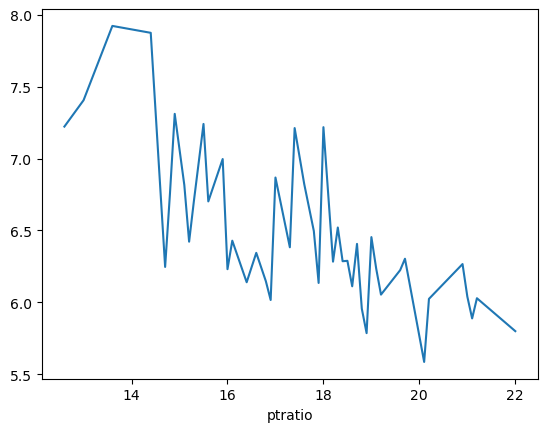

In [27]:
boston.groupby("ptratio")["rm"].mean().plot()

In [32]:
print(boston.groupby("ptratio")["medv"].mean())

ptratio
12.6    32.733333
13.0    38.025000
13.6    50.000000
14.4    50.000000
14.7    25.717647
14.8    25.433333
14.9    40.475000
15.1    31.600000
15.2    26.276923
15.3    26.066667
15.5    32.700000
15.6    30.100000
15.9    30.250000
16.0    24.320000
16.1    24.880000
16.4    23.216667
16.6    23.856250
16.8    22.150000
16.9    19.640000
17.0    30.600000
17.3    24.700000
17.4    33.544444
17.6    30.700000
17.8    26.956522
17.9    22.363636
18.0    33.100000
18.2    22.150000
18.3    27.100000
18.4    23.131250
18.5    23.800000
18.6    24.335294
18.7    25.122222
18.8    17.350000
18.9    20.100000
19.0    24.900000
19.1    22.894118
19.2    22.805263
19.6    22.575000
19.7    21.787500
20.1    12.800000
20.2    16.611429
20.9    21.118182
21.0    17.351852
21.1    18.900000
21.2    17.093333
22.0    19.400000
Name: medv, dtype: float64


rad
1     45.025000
2     64.770833
3     49.310526
4     60.841818
5     69.223478
6     60.142308
7     40.141176
8     67.350000
24    89.805303
Name: age, dtype: float64
Axes(0.125,0.11;0.775x0.77)


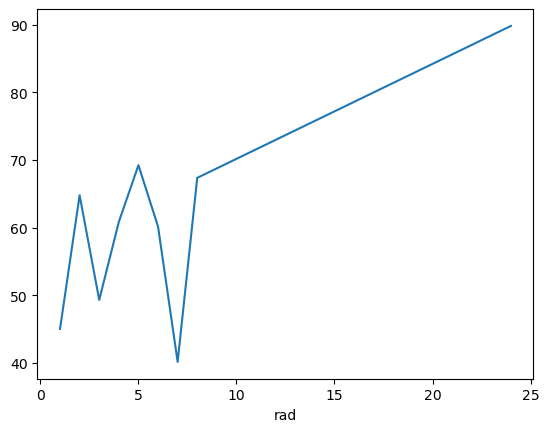

In [36]:
print(boston.groupby("rad")["age"].mean())
print(boston.groupby("rad")["age"].mean().plot())

rad
1     6.555850
2     6.649958
3     6.473026
4     6.133118
5     6.393157
6     6.104731
7     6.647765
8     6.950792
24    6.022152
Name: rm, dtype: float64
Axes(0.125,0.11;0.775x0.77)


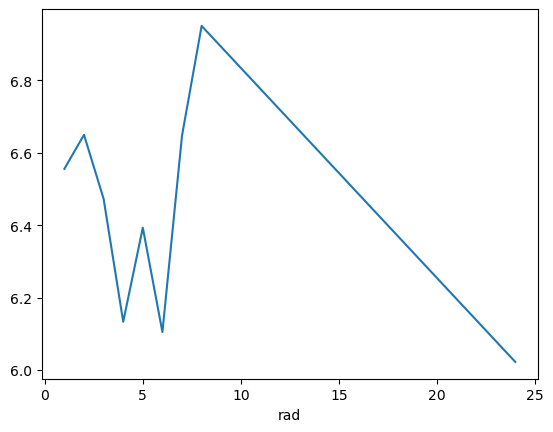

In [38]:
print(boston.groupby("rad")["rm"].mean())
print(boston.groupby("rad")["rm"].mean().plot())

rad
1     291.450000
2     260.666667
3     246.078947
4     335.981818
5     331.843478
6     372.884615
7     304.411765
8     301.250000
24    666.000000
Name: tax, dtype: float64
Axes(0.125,0.11;0.775x0.77)


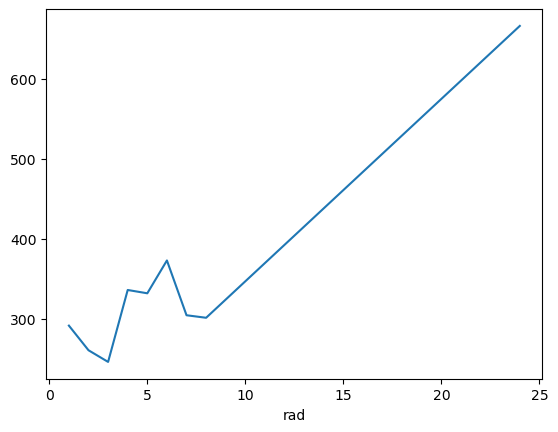

In [40]:
print(boston.groupby("rad")["tax"].mean())
print(boston.groupby("rad")["tax"].mean().plot())

In [56]:
query = "SELECT * FROM dimemployee"
employee = pd.read_sql(sql=query, con=db_engine)
employee.head(10)

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,Gender,PayFrequency,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position
0,1,18.0,14417807,446466105.0,Guy,Gilbert,R,0,Production Technician - WC60,2006-01-28,...,M,1,12.4500,21,30,1,0,Production,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
1,2,7.0,253022876,24756624.0,Kevin,Brown,F,0,Marketing Assistant,2006-08-26,...,M,2,13.4615,42,41,1,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
2,3,14.0,509647174,245797967.0,Roberto,Tamburello,None,0,Engineering Manager,2007-06-11,...,M,2,43.2692,2,21,1,0,Engineering,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
3,4,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,M,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
4,5,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,M,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
5,6,267.0,480168528,974026903.0,Thierry,D'Hers,B,0,Tool Designer,2007-07-11,...,M,2,25.0000,9,24,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
6,7,112.0,24756624,295847284.0,David,Bradley,M,0,Marketing Manager,2007-07-20,...,M,2,37.5000,40,40,1,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
7,8,112.0,24756624,295847284.0,David,Bradley,M,0,Marketing Manager,2007-07-20,...,M,2,37.5000,40,40,1,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
8,9,23.0,309738752,277173473.0,JoLynn,Dobney,M,0,Production Supervisor - WC60,2007-07-26,...,F,2,25.0000,82,61,1,0,Production,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
9,10,189.0,690627818,33237992.0,Ruth,Ellerbrock,Ann,0,Production Technician - WC10,2007-08-06,...,F,1,13.4500,83,61,1,0,Production,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None


In [54]:
query = "SELECT * FROM dimemployeesalesterritory"
salesterritory = pd.read_sql(sql=query, con=db_engine)
salesterritory.head(10)

,EmployeeKey,SalesTerritoryKey
0,272,1
1,277,1
2,286,1
3,289,1
4,293,1
5,272,2
6,277,2
7,281,2
8,272,3
9,277,3


In [66]:
est = pd.merge(left=employee, right=salesterritory, on="EmployeeKey")

In [68]:
est

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,PayFrequency,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,SalesTerritoryKey
0,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,2,48.1010,14,27,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,1
1,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,2,48.1010,14,27,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,2
2,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,2,48.1010,14,27,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,3
3,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,2,48.1010,14,27,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,4
4,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,2,48.1010,14,27,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,5
5,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,2,48.1010,14,27,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,6
6,277,277.0,112432117,112432117.0,Brian,Welcker,S,0,Director of Sales,2010-09-15,...,2,72.1154,10,25,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Director,1
7,277,277.0,112432117,112432117.0,Brian,Welcker,S,0,Director of Sales,2010-09-15,...,2,72.1154,10,25,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Director,2
8,277,277.0,112432117,112432117.0,Brian,Welcker,S,0,Director of Sales,2010-09-15,...,2,72.1154,10,25,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Director,3
9,277,277.0,112432117,112432117.0,Brian,Welcker,S,0,Director of Sales,2010-09-15,...,2,72.1154,10,25,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Director,4


In [70]:
query = "SELECT * FROM dimsalesterritory"
territories = pd.read_sql(sql=query, con=db_engine)
territories.head(10)

,SalesTerritoryKey,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
0,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1,2,2,Northeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2,3,3,Central,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
3,4,4,Southwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
4,5,5,Southeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
5,6,6,Canada,Canada,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
6,7,7,France,France,Europe,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
7,8,8,Germany,Germany,Europe,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
8,9,9,Australia,Australia,Pacific,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
9,10,10,United Kingdom,United Kingdom,Europe,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


In [72]:
employee_territory = pd.merge(left=est, right=territories, on="SalesTerritoryKey")

In [74]:
employee_territory.shape

(39, 34)

In [76]:
employee_territory.groupby("SalesTerritoryRegion").count()

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,SalesTerritoryKey,SalesTerritoryAlternateKey,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
SalesTerritoryRegion,,,,,,,,,,,,,,,,,,,,,
Australia,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Canada,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Central,5,5,5,5,5,5,4,5,5,5,...,5,5,5,5,5,5,5,5,5,5
France,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Germany,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Northeast,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Northwest,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Southeast,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Southwest,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [80]:
employee_territory.groupby("SalesTerritoryCountry").FirstName.count()

SalesTerritoryCountry
Australia          3
Canada             4
France             4
Germany            3
United Kingdom     3
United States     22
Name: FirstName, dtype: int64

In [84]:
employee_territory.groupby("SalesTerritoryRegion").FirstName.count()

SalesTerritoryRegion
Australia         3
Canada            4
Central           5
France            4
Germany           3
Northeast         3
Northwest         5
Southeast         4
Southwest         5
United Kingdom    3
Name: FirstName, dtype: int64

In [82]:
employee_territory.groupby("SalesTerritoryCountry").BaseRate.count()

SalesTerritoryCountry
Australia          3
Canada             4
France             4
Germany            3
United Kingdom     3
United States     22
Name: BaseRate, dtype: int64

In [86]:
employee_territory.groupby("SalesTerritoryRegion").BaseRate.count()

SalesTerritoryRegion
Australia         3
Canada            4
Central           5
France            4
Germany           3
Northeast         3
Northwest         5
Southeast         4
Southwest         5
United Kingdom    3
Name: BaseRate, dtype: int64